<a href="https://colab.research.google.com/github/ZeinabMetwally/CodeAlpha-Task-One-Credit-Scoring/blob/main/Credit_Scoring.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [53]:
!pip install category_encoders


In [54]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats
from sklearn.preprocessing import LabelEncoder
import category_encoders as ce
from sklearn.impute import SimpleImputer
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split

In [55]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [56]:
train=pd.read_csv('/content/drive/MyDrive/Credit Score classification/train.csv')
test=pd.read_csv('/content/drive/MyDrive/Credit Score classification/test.csv')

<ipython-input-56-e381ad96a898>:1: DtypeWarning: Columns (26) have mixed types. Specify dtype option on import or set low_memory=False.
  train=pd.read_csv('/content/drive/MyDrive/Credit Score classification/train.csv')


Explore The Data

In [57]:
train.head()


,ID,Customer_ID,Month,Name,Age,SSN,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,...,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score
0,0x1602,CUS_0xd40,January,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,1824.843333,3,...,_,809.98,26.822620,22 Years and 1 Months,No,49.574949,80.41529543900253,High_spent_Small_value_payments,312.49408867943663,Good
1,0x1603,CUS_0xd40,February,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,NaN,3,...,Good,809.98,31.944960,NaN,No,49.574949,118.28022162236736,Low_spent_Large_value_payments,284.62916249607184,Good
2,0x1604,CUS_0xd40,March,Aaron Maashoh,-500,821-00-0265,Scientist,19114.12,NaN,3,...,Good,809.98,28.609352,22 Years and 3 Months,No,49.574949,81.699521264648,Low_spent_Medium_value_payments,331.2098628537912,Good
3,0x1605,CUS_0xd40,April,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,NaN,3,...,Good,809.98,31.377862,22 Years and 4 Months,No,49.574949,199.4580743910713,Low_spent_Small_value_payments,223.45130972736786,Good
4,0x1606,CUS_0xd40,May,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,1824.843333,3,...,Good,809.98,24.797347,22 Years and 5 Months,No,49.574949,41.420153086217326,High_spent_Medium_value_payments,341.48923103222177,Good


In [58]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 28 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   ID                        100000 non-null  object 
 1   Customer_ID               100000 non-null  object 
 2   Month                     100000 non-null  object 
 3   Name                      90015 non-null   object 
 4   Age                       100000 non-null  object 
 5   SSN                       100000 non-null  object 
 6   Occupation                100000 non-null  object 
 7   Annual_Income             100000 non-null  object 
 8   Monthly_Inhand_Salary     84998 non-null   float64
 9   Num_Bank_Accounts         100000 non-null  int64  
 10  Num_Credit_Card           100000 non-null  int64  
 11  Interest_Rate             100000 non-null  int64  
 12  Num_of_Loan               100000 non-null  object 
 13  Type_of_Loan              88592 non-null   ob

In [59]:
train.describe()

,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Delay_from_due_date,Num_Credit_Inquiries,Credit_Utilization_Ratio,Total_EMI_per_month
count,84998.000000,100000.000000,100000.00000,100000.000000,100000.000000,98035.000000,100000.000000,100000.000000
mean,4194.170850,17.091280,22.47443,72.466040,21.068780,27.754251,32.285173,1403.118217
std,3183.686167,117.404834,129.05741,466.422621,14.860104,193.177339,5.116875,8306.041270
min,303.645417,-1.000000,0.00000,1.000000,-5.000000,0.000000,20.000000,0.000000
25%,1625.568229,3.000000,4.00000,8.000000,10.000000,3.000000,28.052567,30.306660
50%,3093.745000,6.000000,5.00000,13.000000,18.000000,6.000000,32.305784,69.249473
75%,5957.448333,7.000000,7.00000,20.000000,28.000000,9.000000,36.496663,161.224249
max,15204.633333,1798.000000,1499.00000,5797.000000,67.000000,2597.000000,50.000000,82331.000000


In [60]:
test.head()

,ID,Customer_ID,Month,Name,Age,SSN,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,...,Num_Credit_Inquiries,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance
0,0x160a,CUS_0xd40,September,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,1824.843333,3,...,2022.0,Good,809.98,35.030402,22 Years and 9 Months,No,49.574949,236.64268203272135,Low_spent_Small_value_payments,186.26670208571772
1,0x160b,CUS_0xd40,October,Aaron Maashoh,24,821-00-0265,Scientist,19114.12,1824.843333,3,...,4.0,Good,809.98,33.053114,22 Years and 10 Months,No,49.574949,21.465380264657146,High_spent_Medium_value_payments,361.44400385378196
2,0x160c,CUS_0xd40,November,Aaron Maashoh,24,821-00-0265,Scientist,19114.12,1824.843333,3,...,4.0,Good,809.98,33.811894,NaN,No,49.574949,148.23393788500925,Low_spent_Medium_value_payments,264.67544623342997
3,0x160d,CUS_0xd40,December,Aaron Maashoh,24_,821-00-0265,Scientist,19114.12,NaN,3,...,4.0,Good,809.98,32.430559,23 Years and 0 Months,No,49.574949,39.08251089460281,High_spent_Medium_value_payments,343.82687322383634
4,0x1616,CUS_0x21b1,September,Rick Rothackerj,28,004-07-5839,_______,34847.84,3037.986667,2,...,5.0,Good,605.03,25.926822,27 Years and 3 Months,No,18.816215,39.684018417945296,High_spent_Large_value_payments,485.2984336755923


In [61]:
train.duplicated().any()
test.duplicated().any()

False

In [63]:
train.shape

(100000, 28)

In [64]:
test.shape

(50000, 27)

In [65]:
train['Credit_Score']

0            Good
1            Good
2            Good
3            Good
4            Good
           ...   
99995        Poor
99996        Poor
99997        Poor
99998    Standard
99999        Poor
Name: Credit_Score, Length: 100000, dtype: object

In [66]:
train['Credit_Score'].value_counts()

Standard    53174
Poor        28998
Good        17828
Name: Credit_Score, dtype: int64

In [67]:
train.dtypes

ID                           object
Customer_ID                  object
Month                        object
Name                         object
Age                          object
SSN                          object
Occupation                   object
Annual_Income                object
Monthly_Inhand_Salary       float64
Num_Bank_Accounts             int64
Num_Credit_Card               int64
Interest_Rate                 int64
Num_of_Loan                  object
Type_of_Loan                 object
Delay_from_due_date           int64
Num_of_Delayed_Payment       object
Changed_Credit_Limit         object
Num_Credit_Inquiries        float64
Credit_Mix                   object
Outstanding_Debt             object
Credit_Utilization_Ratio    float64
Credit_History_Age           object
Payment_of_Min_Amount        object
Total_EMI_per_month         float64
Amount_invested_monthly      object
Payment_Behaviour            object
Monthly_Balance              object
Credit_Score                

In [68]:
train.columns


Index(['ID', 'Customer_ID', 'Month', 'Name', 'Age', 'SSN', 'Occupation',
       'Annual_Income', 'Monthly_Inhand_Salary', 'Num_Bank_Accounts',
       'Num_Credit_Card', 'Interest_Rate', 'Num_of_Loan', 'Type_of_Loan',
       'Delay_from_due_date', 'Num_of_Delayed_Payment', 'Changed_Credit_Limit',
       'Num_Credit_Inquiries', 'Credit_Mix', 'Outstanding_Debt',
       'Credit_Utilization_Ratio', 'Credit_History_Age',
       'Payment_of_Min_Amount', 'Total_EMI_per_month',
       'Amount_invested_monthly', 'Payment_Behaviour', 'Monthly_Balance',
       'Credit_Score'],
      dtype='object')

In [69]:
train.isnull().sum()

ID                              0
Customer_ID                     0
Month                           0
Name                         9985
Age                             0
SSN                             0
Occupation                      0
Annual_Income                   0
Monthly_Inhand_Salary       15002
Num_Bank_Accounts               0
Num_Credit_Card                 0
Interest_Rate                   0
Num_of_Loan                     0
Type_of_Loan                11408
Delay_from_due_date             0
Num_of_Delayed_Payment       7002
Changed_Credit_Limit            0
Num_Credit_Inquiries         1965
Credit_Mix                      0
Outstanding_Debt                0
Credit_Utilization_Ratio        0
Credit_History_Age           9030
Payment_of_Min_Amount           0
Total_EMI_per_month             0
Amount_invested_monthly      4479
Payment_Behaviour               0
Monthly_Balance              1200
Credit_Score                    0
dtype: int64

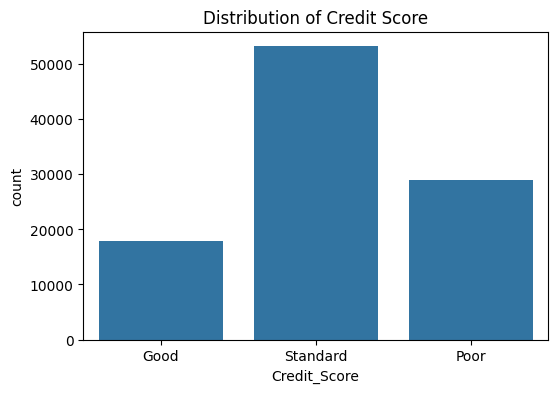

In [70]:
plt.figure(figsize=(6, 4))
sns.countplot(data=train, x='Credit_Score')
plt.title('Distribution of Credit Score')
plt.show()

In [71]:
# for col in train.select_dtypes(include = np.number):
#     plt.figure(figsize=(15,5))
#     plt.subplot(1,2,1)
#     sns.boxplot(x=col, data =train)
#     plt.subplot(1,2,2)
#     sns.boxplot(x='Credit_Score',y=col, data =train)
#     plt.show()

In [72]:
#label encoding for credit score (0..1..2)

columns=[
      'Credit_Score']
for item in columns:
    train[item] = LabelEncoder().fit_transform(train[item])
train.head()

,ID,Customer_ID,Month,Name,Age,SSN,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,...,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score
0,0x1602,CUS_0xd40,January,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,1824.843333,3,...,_,809.98,26.822620,22 Years and 1 Months,No,49.574949,80.41529543900253,High_spent_Small_value_payments,312.49408867943663,0
1,0x1603,CUS_0xd40,February,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,NaN,3,...,Good,809.98,31.944960,NaN,No,49.574949,118.28022162236736,Low_spent_Large_value_payments,284.62916249607184,0
2,0x1604,CUS_0xd40,March,Aaron Maashoh,-500,821-00-0265,Scientist,19114.12,NaN,3,...,Good,809.98,28.609352,22 Years and 3 Months,No,49.574949,81.699521264648,Low_spent_Medium_value_payments,331.2098628537912,0
3,0x1605,CUS_0xd40,April,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,NaN,3,...,Good,809.98,31.377862,22 Years and 4 Months,No,49.574949,199.4580743910713,Low_spent_Small_value_payments,223.45130972736786,0
4,0x1606,CUS_0xd40,May,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,1824.843333,3,...,Good,809.98,24.797347,22 Years and 5 Months,No,49.574949,41.420153086217326,High_spent_Medium_value_payments,341.48923103222177,0


In [73]:
train['Credit_Score'].value_counts()

2    53174
1    28998
0    17828
Name: Credit_Score, dtype: int64

In [74]:
columns = ['Payment_of_Min_Amount','Payment_Behaviour','Name','Occupation','Credit_Mix']
for item in columns:
    train[item] = LabelEncoder().fit_transform(train[item])
train.head()

,ID,Customer_ID,Month,Name,Age,SSN,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,...,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score
0,0x1602,CUS_0xd40,January,84,23,821-00-0265,12,19114.12,1824.843333,3,...,3,809.98,26.822620,22 Years and 1 Months,1,49.574949,80.41529543900253,3,312.49408867943663,0
1,0x1603,CUS_0xd40,February,84,23,821-00-0265,12,19114.12,NaN,3,...,1,809.98,31.944960,NaN,1,49.574949,118.28022162236736,4,284.62916249607184,0
2,0x1604,CUS_0xd40,March,84,-500,821-00-0265,12,19114.12,NaN,3,...,1,809.98,28.609352,22 Years and 3 Months,1,49.574949,81.699521264648,5,331.2098628537912,0
3,0x1605,CUS_0xd40,April,84,23,821-00-0265,12,19114.12,NaN,3,...,1,809.98,31.377862,22 Years and 4 Months,1,49.574949,199.4580743910713,6,223.45130972736786,0
4,0x1606,CUS_0xd40,May,84,23,821-00-0265,12,19114.12,1824.843333,3,...,1,809.98,24.797347,22 Years and 5 Months,1,49.574949,41.420153086217326,2,341.48923103222177,0


In [75]:
train[['Payment_of_Min_Amount','Payment_Behaviour','Name','Occupation','Credit_Mix']]

,Payment_of_Min_Amount,Payment_Behaviour,Name,Occupation,Credit_Mix
0,1,3,84,12,3
1,1,4,84,12,1
2,1,5,84,12,1
3,1,6,84,12,1
4,1,2,84,12,1
...,...,...,...,...,...
99995,1,1,6528,9,3
99996,1,2,6528,9,3
99997,1,1,6528,9,1
99998,1,4,6528,9,1


In [76]:
train.dtypes

ID                           object
Customer_ID                  object
Month                        object
Name                          int64
Age                          object
SSN                          object
Occupation                    int64
Annual_Income                object
Monthly_Inhand_Salary       float64
Num_Bank_Accounts             int64
Num_Credit_Card               int64
Interest_Rate                 int64
Num_of_Loan                  object
Type_of_Loan                 object
Delay_from_due_date           int64
Num_of_Delayed_Payment       object
Changed_Credit_Limit         object
Num_Credit_Inquiries        float64
Credit_Mix                    int64
Outstanding_Debt             object
Credit_Utilization_Ratio    float64
Credit_History_Age           object
Payment_of_Min_Amount         int64
Total_EMI_per_month         float64
Amount_invested_monthly      object
Payment_Behaviour             int64
Monthly_Balance              object
Credit_Score                

In [77]:
columns2 =['Annual_Income','Age','Num_Credit_Card','Interest_Rate','Delay_from_due_date','Num_of_Delayed_Payment','Monthly_Balance',
                           'Num_Credit_Inquiries','Changed_Credit_Limit','Credit_History_Age',
                           'Outstanding_Debt','Total_EMI_per_month']
for item in columns2:
    mean_encoding = train.groupby([item])['Credit_Score'].mean()
    train[item] = train[item].map(mean_encoding)
train.head()

,ID,Customer_ID,Month,Name,Age,SSN,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,...,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score
0,0x1602,CUS_0xd40,January,84,1.383130,821-00-0265,12,0.25,1824.843333,3,...,3,0.25,26.822620,1.284314,1,0.25,80.41529543900253,3,0.0,0
1,0x1603,CUS_0xd40,February,84,1.383130,821-00-0265,12,0.25,NaN,3,...,1,0.25,31.944960,NaN,1,0.25,118.28022162236736,4,0.0,0
2,0x1604,CUS_0xd40,March,84,1.319413,821-00-0265,12,0.25,NaN,3,...,1,0.25,28.609352,1.219008,1,0.25,81.699521264648,5,0.0,0
3,0x1605,CUS_0xd40,April,84,1.383130,821-00-0265,12,0.25,NaN,3,...,1,0.25,31.377862,1.243902,1,0.25,199.4580743910713,6,0.0,0
4,0x1606,CUS_0xd40,May,84,1.383130,821-00-0265,12,0.25,1824.843333,3,...,1,0.25,24.797347,1.212245,1,0.25,41.420153086217326,2,0.0,0


In [78]:
train.drop('Type_of_Loan',axis=1,inplace=True)

In [79]:
train.dtypes

ID                           object
Customer_ID                  object
Month                        object
Name                          int64
Age                         float64
SSN                          object
Occupation                    int64
Annual_Income               float64
Monthly_Inhand_Salary       float64
Num_Bank_Accounts             int64
Num_Credit_Card             float64
Interest_Rate               float64
Num_of_Loan                  object
Delay_from_due_date         float64
Num_of_Delayed_Payment      float64
Changed_Credit_Limit        float64
Num_Credit_Inquiries        float64
Credit_Mix                    int64
Outstanding_Debt            float64
Credit_Utilization_Ratio    float64
Credit_History_Age          float64
Payment_of_Min_Amount         int64
Total_EMI_per_month         float64
Amount_invested_monthly      object
Payment_Behaviour             int64
Monthly_Balance             float64
Credit_Score                  int64
dtype: object

In [80]:
columns_to_drop = ['ID', 'Customer_ID', 'Month', 'SSN', 'Amount_invested_monthly']
train.drop(columns=columns_to_drop, inplace=True)

In [81]:
X=train.drop('Credit_Score',axis=1)
y = train.Credit_Score

In [82]:
columns3 =['Name','Annual_Income','Num_of_Loan',
                           'Outstanding_Debt']
for item in columns3:
    train.drop(item,axis=1,inplace=True)
X=train.drop('Credit_Score',axis=1)
y = train.Credit_Score

In [83]:
X.columns

Index(['Age', 'Occupation', 'Monthly_Inhand_Salary', 'Num_Bank_Accounts',
       'Num_Credit_Card', 'Interest_Rate', 'Delay_from_due_date',
       'Num_of_Delayed_Payment', 'Changed_Credit_Limit',
       'Num_Credit_Inquiries', 'Credit_Mix', 'Credit_Utilization_Ratio',
       'Credit_History_Age', 'Payment_of_Min_Amount', 'Total_EMI_per_month',
       'Payment_Behaviour', 'Monthly_Balance'],
      dtype='object')

#split Data

In [84]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.33,shuffle=True,random_state=42)

In [85]:
# imputes missing values in both the training and test datasets using the mean of each feature
from sklearn.impute import SimpleImputer

imputer = SimpleImputer(strategy='mean')
X_train_imputed = imputer.fit_transform(X_train)
X_test_imputed = imputer.transform(X_test)


#LogisticRegression

In [86]:
from sklearn.linear_model import LogisticRegression,RidgeClassifier


logistic_model = LogisticRegression()
logistic_model.fit(X_train_imputed, y_train)

train_predictions = logistic_model.predict(X_train_imputed)
test_predictions = logistic_model.predict(X_test_imputed)

train_accuracy = accuracy_score(train_predictions, y_train)
test_accuracy = accuracy_score(test_predictions, y_test)

print("Logistic Regression Training Accuracy:", train_accuracy)
print("Logistic Regression Testing Accuracy:", test_accuracy)

Logistic Regression Training Accuracy: 0.5943134328358209
Logistic Regression Testing Accuracy: 0.5948484848484848


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


#KNN

In [87]:
from sklearn.neighbors import KNeighborsClassifier

knn_model = KNeighborsClassifier()
knn_model.fit(X_train_imputed, y_train)

knn_train_predictions = knn_model.predict(X_train_imputed)
knn_test_predictions = knn_model.predict(X_test_imputed)

knn_train_accuracy = accuracy_score(knn_train_predictions, y_train)
knn_test_accuracy = accuracy_score(knn_test_predictions, y_test)

print("KNeighborsClassifier Training Accuracy:", knn_train_accuracy)
print("KNeighborsClassifier Test Accuracy:", knn_test_accuracy)

KNeighborsClassifier Training Accuracy: 0.8032537313432836
KNeighborsClassifier Test Accuracy: 0.6743636363636364


#SVM

In [88]:
from sklearn.svm import LinearSVC

svc_model = LinearSVC()
svc_model.fit(X_train_imputed, y_train)

svc_train_predictions = svc_model.predict(X_train_imputed)
svc_test_predictions = svc_model.predict(X_test_imputed)

svc_train_accuracy = accuracy_score(svc_train_predictions, y_train)
svc_test_accuracy = accuracy_score(svc_test_predictions, y_test)

print("LinearSVC Training Accuracy:", svc_train_accuracy)
print("LinearSVC Test Accuracy:", svc_test_accuracy)

LinearSVC Training Accuracy: 0.8778059701492538
LinearSVC Test Accuracy: 0.8766363636363637


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
